In [25]:
import pandas as pd
import scipy

In [4]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [5]:
df = df.dropna()

In [6]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# Exercise 1

In [26]:
r, p = scipy.stats.pearsonr(df['bmi'], df['avg_glucose_level'])

In [27]:
print(r, p)

0.17550217613626068 2.9762029034555275e-35


# Exercise 2

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

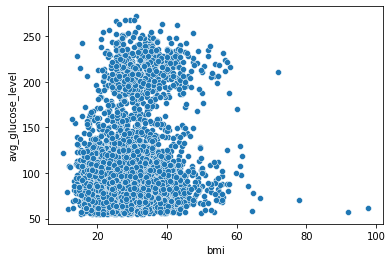

In [9]:
sns.scatterplot(x=df['bmi'],y=df['avg_glucose_level'])

Text(0, 0.5, 'Avg Glucose Level')

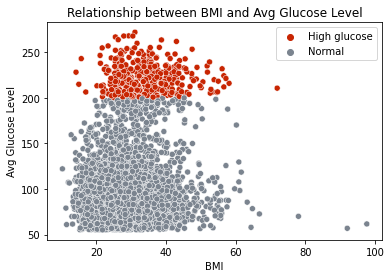

In [12]:
high_glucose_level = df['avg_glucose_level'] >= 200
high_glucose_level = high_glucose_level.map({True: 'High glucose', False: 'Normal'})
color_dict = dict({"High glucose": '#C82502','Normal':'#7B848F'})
p = sns.scatterplot(x=df['bmi'], y=df['avg_glucose_level'], hue=high_glucose_level, palette=color_dict)
p.legend_.set_title(None)
plt.title('Relationship between BMI and Avg Glucose Level')
plt.xlabel('BMI')
plt.ylabel('Avg Glucose Level')

# Exercise 3
## Linear Regression Analysis

In [13]:
import statsmodels.api as sm
from scipy import stats
X = df['bmi']
Y = df['avg_glucose_level']
X_new = sm.add_constant(X)
regcorr = sm.OLS(Y, X_new)
stats = regcorr.fit()
print(stats.summary())

                            OLS Regression Results                            
Dep. Variable:      avg_glucose_level   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     155.9
Date:                Wed, 02 Nov 2022   Prob (F-statistic):           2.98e-35
Time:                        20:43:11   Log-Likelihood:                -25512.
No. Observations:                4909   AIC:                         5.103e+04
Df Residuals:                    4907   BIC:                         5.104e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         76.6234      2.380     32.193      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


The best-fit line equation is: Y = 76.62 + 0.9927X

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


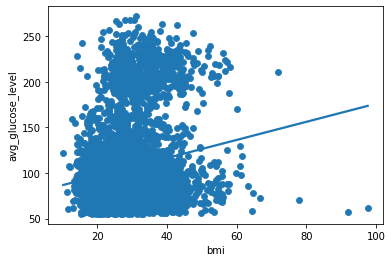

In [16]:
sns.scatterplot(df['bmi'], df['avg_glucose_level'])
sns.regplot(x='bmi',y='avg_glucose_level', data=df, ci=None)

## Multiple Linear Regression Analysis

In [17]:
features = ['age','hypertension', 'heart_disease','bmi','stroke']
label=['avg_glucose_level']

X = df[features]
Y = df[label]
X_new = sm.add_constant(X)
regcorr = sm.OLS(Y, X_new)
stats = regcorr.fit()
print(stats.summary())

                            OLS Regression Results                            
Dep. Variable:      avg_glucose_level   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     101.1
Date:                Wed, 02 Nov 2022   Prob (F-statistic):          7.97e-102
Time:                        20:59:35   Log-Likelihood:                -25348.
No. Observations:                4909   AIC:                         5.071e+04
Df Residuals:                    4903   BIC:                         5.075e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            73.6525      2.362     31.181

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
